In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("housing.csv")

In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Since there are only a few null values, drop them
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
from sklearn.model_selection import train_test_split

# Define X and Y values
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
train_data = X_train.join(Y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3406,-118.30,34.26,28.0,1643.0,489.0,1142.0,458.0,3.1607,<1H OCEAN,200600.0
8141,-118.11,33.82,36.0,1742.0,340.0,857.0,341.0,4.6875,<1H OCEAN,218200.0
19057,-121.84,38.13,33.0,596.0,105.0,212.0,94.0,4.2813,INLAND,81300.0
1767,-122.34,37.95,44.0,1788.0,368.0,933.0,329.0,2.8750,NEAR BAY,133400.0
13630,-117.33,34.08,37.0,2267.0,405.0,1175.0,403.0,3.7500,INLAND,95200.0
...,...,...,...,...,...,...,...,...,...,...
13953,-117.12,34.21,19.0,4641.0,994.0,1334.0,474.0,4.5972,INLAND,123900.0
18445,-121.81,37.25,25.0,4096.0,623.0,2128.0,618.0,6.2957,<1H OCEAN,251800.0
9230,-120.11,36.96,17.0,3344.0,570.0,1624.0,536.0,3.8952,INLAND,95300.0
11299,-117.93,33.78,28.0,4380.0,820.0,2187.0,835.0,3.9018,<1H OCEAN,182300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

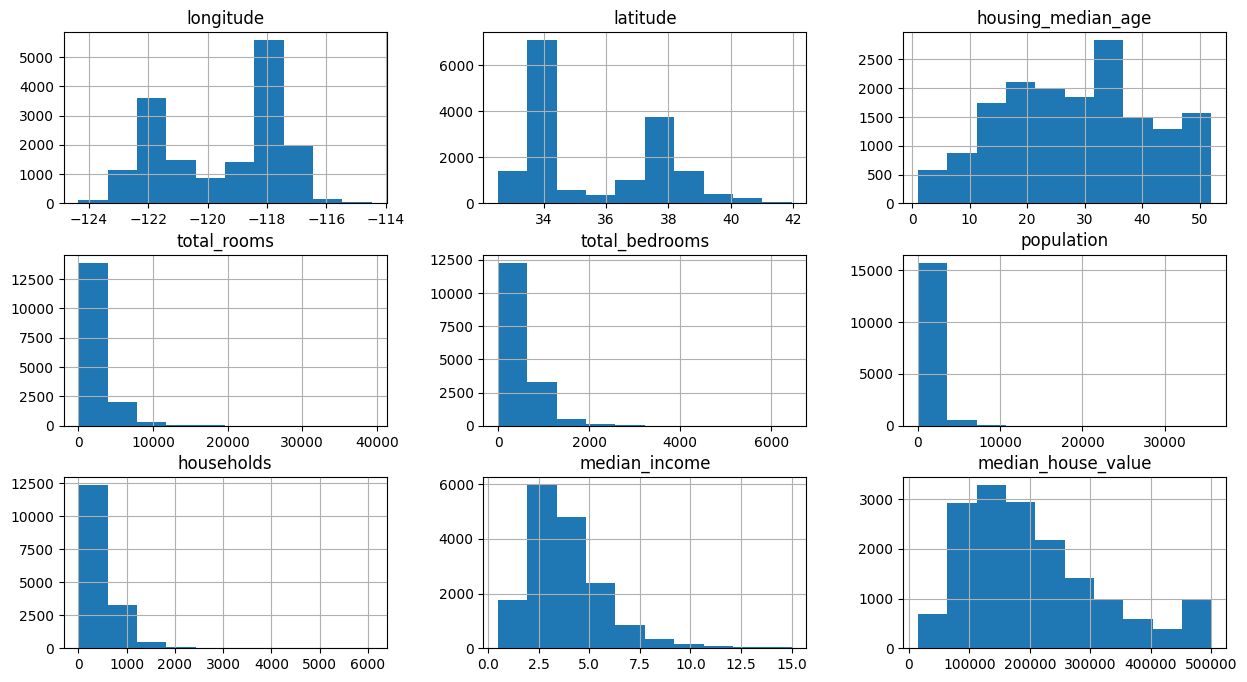

In [17]:
# Visualize the distribution of the training data
train_data.hist(figsize=(15, 8))

<Axes: >

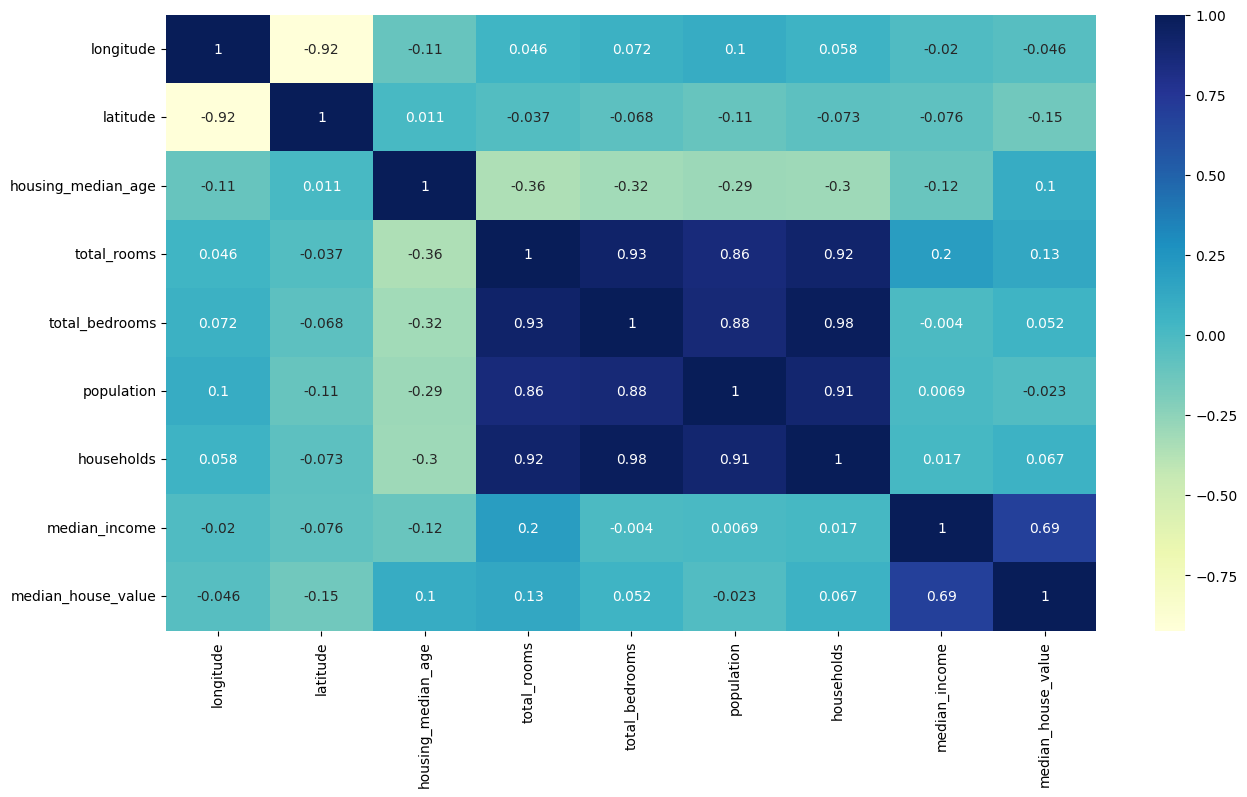

In [18]:
# Plot a heatmap of the correlation matrix of the training data
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

# Data Preprocessing

In [19]:
# Take a logarithm of the data so that the data isn't skewed
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

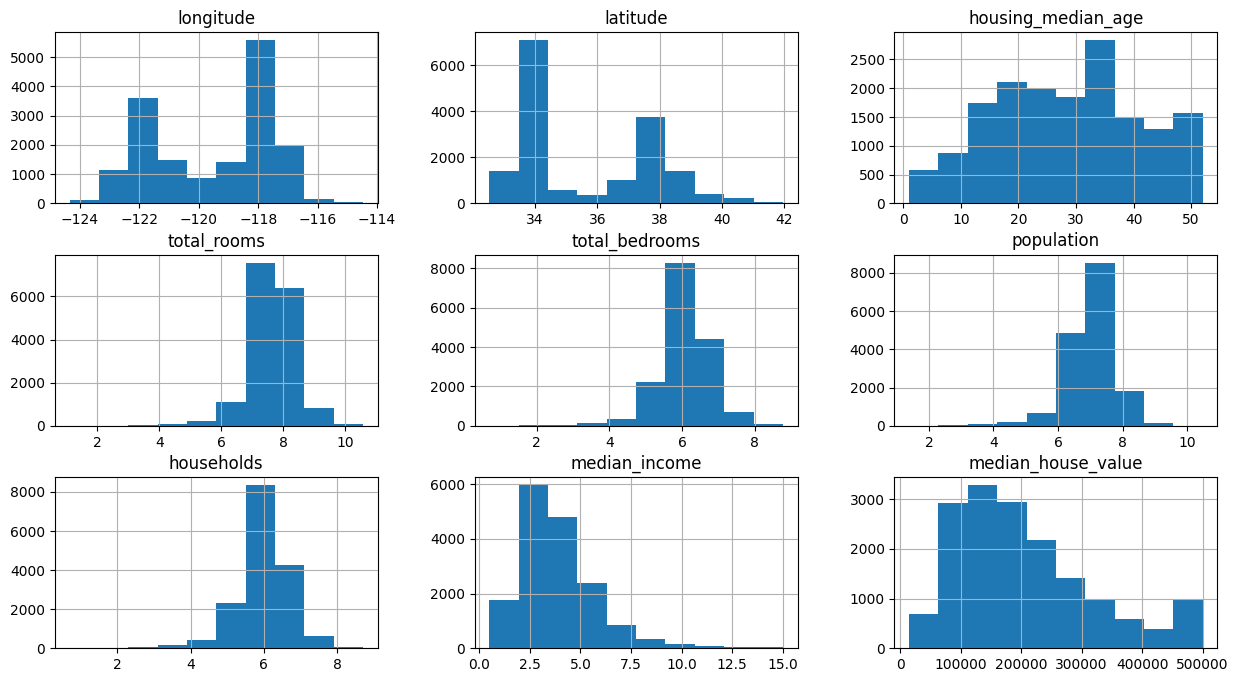

In [20]:
train_data.hist(figsize=(15, 8))

In [21]:
# One-hot-encode ocean proximity values
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3406,-118.30,34.26,28.0,7.404888,6.194405,7.041412,6.129050,3.1607,200600.0,1,0,0,0,0
8141,-118.11,33.82,36.0,7.463363,5.831882,6.754604,5.834811,4.6875,218200.0,1,0,0,0,0
19057,-121.84,38.13,33.0,6.391917,4.663439,5.361292,4.553877,4.2813,81300.0,0,1,0,0,0
1767,-122.34,37.95,44.0,7.489412,5.910797,6.839476,5.799093,2.8750,133400.0,0,0,0,1,0
13630,-117.33,34.08,37.0,7.726654,6.006353,7.069874,6.001415,3.7500,95200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,-117.12,34.21,19.0,8.442901,6.902743,7.196687,6.163315,4.5972,123900.0,0,1,0,0,0
18445,-121.81,37.25,25.0,8.318010,6.436150,7.663408,6.428105,6.2957,251800.0,1,0,0,0,0
9230,-120.11,36.96,17.0,8.115222,6.347389,7.393263,6.285998,3.8952,95300.0,0,1,0,0,0
11299,-117.93,33.78,28.0,8.385032,6.710523,7.690743,6.728629,3.9018,182300.0,1,0,0,0,0


<Axes: >

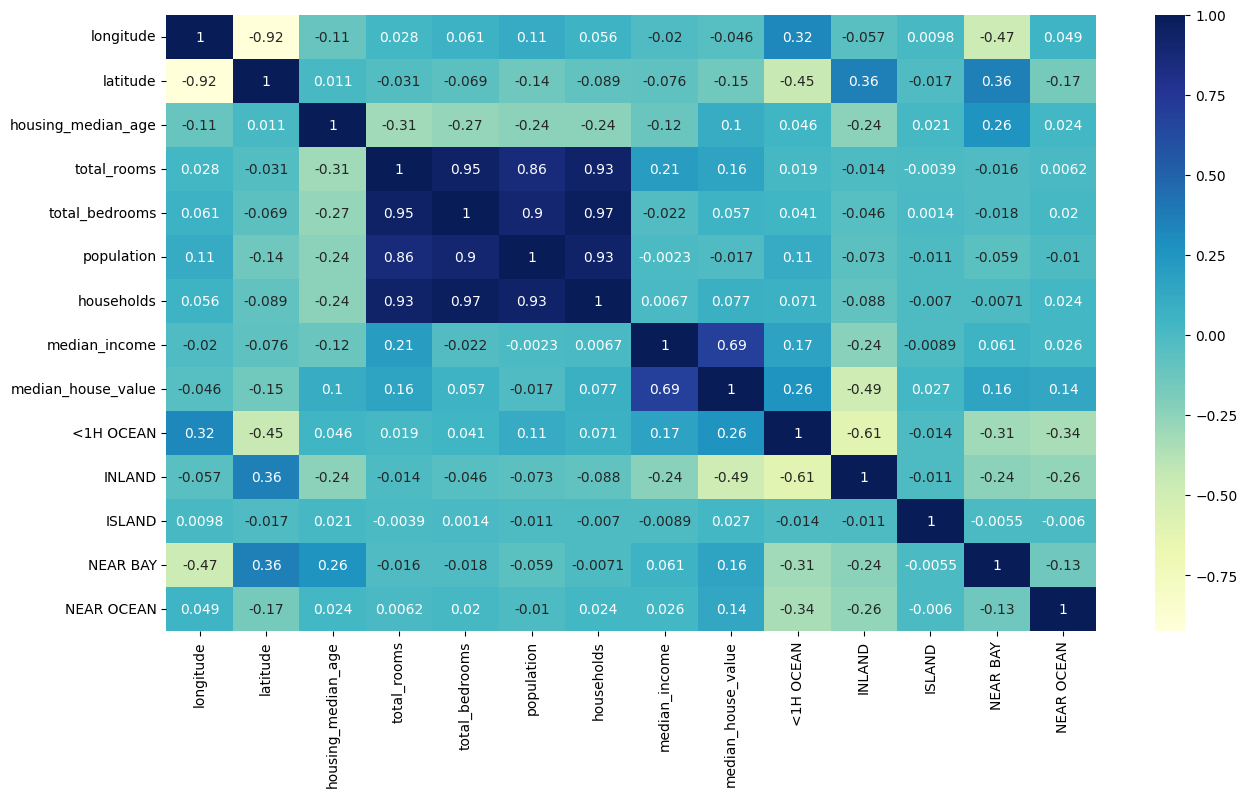

In [23]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

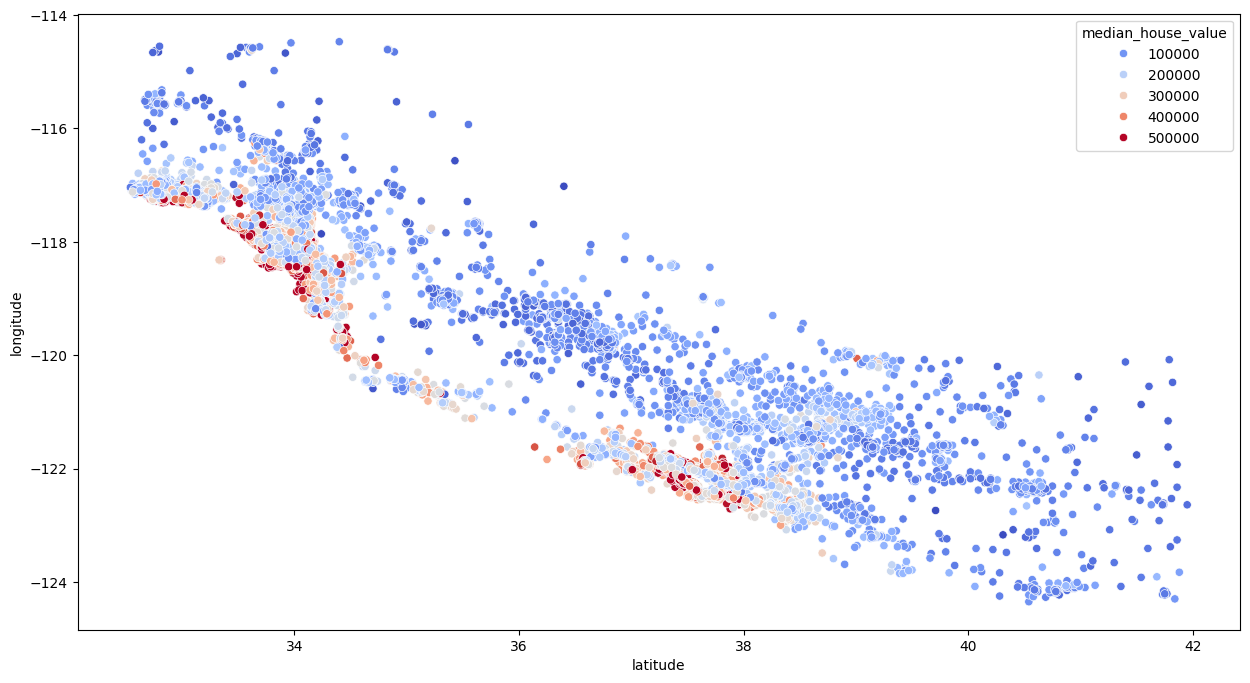

In [24]:
# Visualize data in terms of coordinates
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

# Feature Engineering

In [25]:
# Add a ratio of bedrooms to normal rooms in the dataset
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
# Add a ratio of rooms to households in the dataset
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

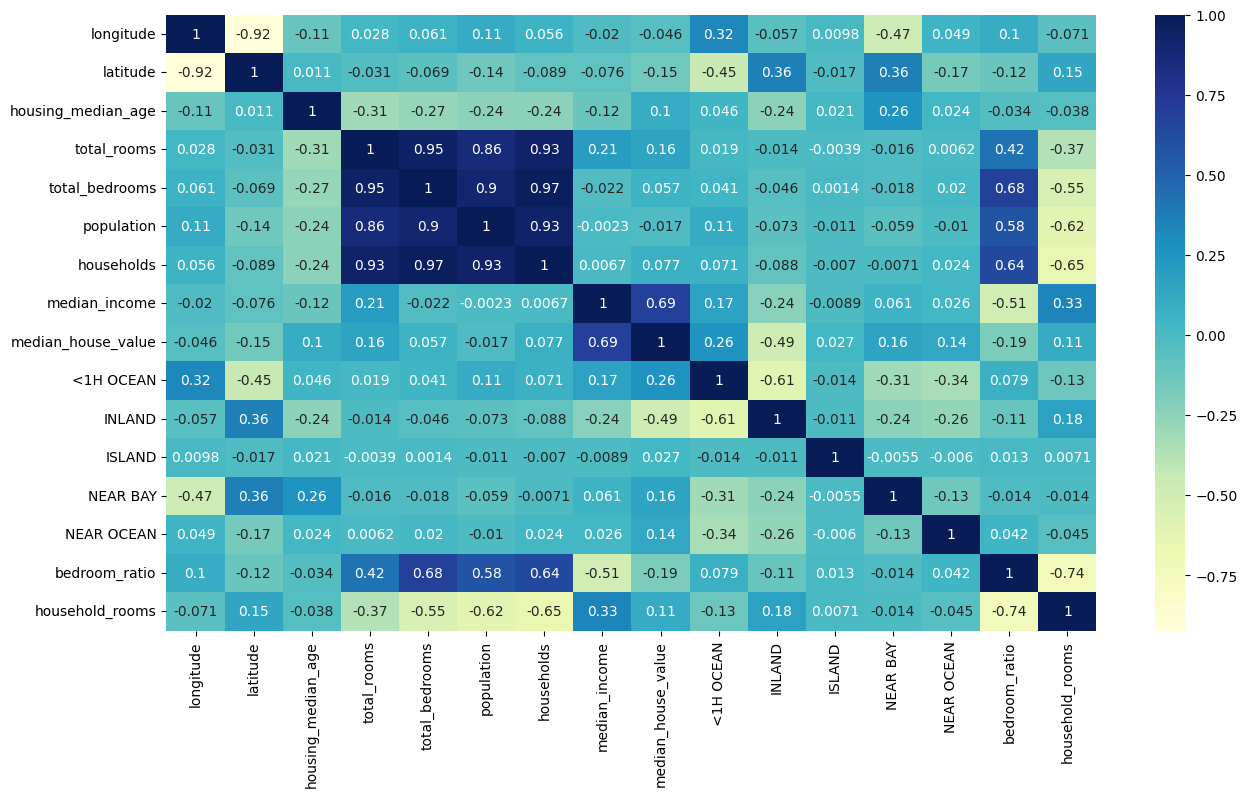

In [26]:
# Show a correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

# Model Training

## Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s, Y_train)

LinearRegression()

In [28]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [29]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [30]:
X_test_s = scaler.transform(X_test)

In [31]:
reg.score(X_test_s, Y_test)

0.677815648891257

## Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [33]:
forest.score(X_test_s, Y_test)

0.8149857193275433

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 300],
    'max_features': [8, 10],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train_s, Y_train)

In [56]:
best_forest = grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [54]:
best_forest.score(X_test_s, Y_test)

0.8120826791477835